# Linear regression of m5C modification frequencies

In [1]:
#libraries
library(tidyverse)
library(MASS)
library(DescTools)
library(pwr)
library(repr)
library(cowplot)
library(ggseqlogo)
library(reshape2)

library(extrafont)
font_import() 
loadfonts(device = "pdf")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Registering fonts with R



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/, ~/.local/share/fonts/ ...

Extracting .afm files from .ttf files...

/home/kristin/.local/share/fonts/Arimo-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/home/kristin/.local/share/fonts/Arimo-Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/Arimo-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/home/kristin/.local/share/fonts/Arimo-BoldItalic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/home/kristin/.local/share/fonts/Arimo-BoldItalic.ttf' '/tmp/Rtmpqlv5rM/fonts/Arimo-BoldItalic' 2>&1' had status 139”
 : No FontName. Skipping.

/home/kristin/.local/share/fonts/Arimo-Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfi

 : No FontName. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf' '/tmp/Rtmpqlv5rM/fonts/DejaVuSerif-Italic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf' '/tmp/Rtmpqlv5rM/fonts/DejaVuSerif' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/

 : No FontName. Skipping.

/usr/share/fonts/truetype/fonts-guru-extra/Saab.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/fonts-guru-extra/Saab.ttf' '/tmp/Rtmpqlv5rM/fonts/Saab' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/fonts-kalapi/Kalapi.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/fonts-kalapi/Kalapi.ttf' '/tmp/Rtmpqlv5rM/fonts/Kalapi' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/fonts-orya-extra/utkal.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/

 : No FontName. Skipping.

/usr/share/fonts/truetype/freefont/FreeSansOblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/freefont/FreeSansOblique.ttf' '/tmp/Rtmpqlv5rM/fonts/FreeSansOblique' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/freefont/FreeSerif.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/freefont/FreeSerif.ttf' '/tmp/Rtmpqlv5rM/fonts/FreeSerif' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//tt

/usr/share/fonts/truetype/kacst/KacstTitle.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/kacst/KacstTitle.ttf' '/tmp/Rtmpqlv5rM/fonts/KacstTitle' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/kacst/KacstTitleL.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/kacst/KacstTitleL.ttf' '/tmp/Rtmpqlv5rM/fonts/KacstTitleL' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/kacst/mry_KacstQurn.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/kacst/mr

Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/LiberationMono-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf' '/tmp/Rtmpqlv5rM/fonts/LiberationMono-BoldItalic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a 

/usr/share/fonts/truetype/liberation2/LiberationSans-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/liberation2/LiberationSans-Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/LiberationSans-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/liberation2/LiberationSans-BoldItalic.ttf' '/tmp/Rtmpqlv5rM/fonts/LiberationSans-BoldItalic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/liberation2/LiberationSans-Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running c

 : No FontName. Skipping.

/usr/share/fonts/truetype/malayalam/Karumbi-Regular.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/malayalam/Karumbi-Regular.ttf' '/tmp/Rtmpqlv5rM/fonts/Karumbi-Regular' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/malayalam/Keraleeyam-Regular.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/malayalam/Keraleeyam-Regular.ttf' '/tmp/Rtmpqlv5rM/fonts/Keraleeyam-Regular' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/

 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS.ttf' '/tmp/Rtmpqlv5rM/fonts/Comic_Sans_MS' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS_Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Comic_Sans_MS_Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/Comic_Sans_MS_Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Courier_New.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/us

 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/Times_New_Roman_Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Italic.ttf' '/tmp/Rtmpqlv5rM/fonts/Times_New_Roman_Italic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tm

 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Verdana_Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Verdana_Italic.ttf' '/tmp/Rtmpqlv5rM/fonts/Verdana_Italic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Verdana_Bold_Italic.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/msttcorefonts/Verdana_Bold_Italic.ttf' '/tmp/Rtmpqlv5rM/fonts/Verdana_Bold_Italic' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/msttcorefonts/Webdings.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''

 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/Garuda-Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/Garuda-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf' '/tmp/Rtmpqlv5rM/fonts/Garuda-BoldOblique' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt

/usr/share/fonts/truetype/tlwg/Norasi-Oblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/Norasi-Oblique.ttf' '/tmp/Rtmpqlv5rM/fonts/Norasi-Oblique' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/Norasi.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/Norasi.ttf' '/tmp/Rtmpqlv5rM/fonts/Norasi' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/Purisa-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/Purisa-Bold.t

 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/TlwgTypo-Bold.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/TlwgTypo-Bold.ttf' '/tmp/Rtmpqlv5rM/fonts/TlwgTypo-Bold' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/TlwgTypo-BoldOblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/tlwg/TlwgTypo-BoldOblique.ttf' '/tmp/Rtmpqlv5rM/fonts/TlwgTypo-BoldOblique' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/tlwg/TlwgTypo-Oblique.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt

Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/ubuntu/Ubuntu-MI.ttf' '/tmp/Rtmpqlv5rM/fonts/Ubuntu-MI' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/ubuntu/Ubuntu-R.ttf' '/tmp/Rtmpqlv5rM/fonts/Ubuntu-R' 2>&1' had status 139”
 : No FontName. Skipping.

/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf
Warning message in system2(enc2native(ttf2pt1), c(args, shQuote(ttfiles[i]), shQuote(tmpfiles[i])), :
“running command ''/usr/local/lib/R/site-library/Rttf2pt1/exec//ttf2pt1' -a -GfAe '/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf' '/tmp/Rtmpqlv5rM/fonts/Ubuntu-RI' 2>&1' had 

In [2]:
# HELPERS 

load_cgmap <- function(cgmap,strain, replicate, growth_phase, metabolic_condition='S'){
    
    cols = c('chromosome', 'base', 'position', 'trinuc_context','dinuc_context', 
         "methylation_frequency", "count_mC", "coverage")

    outdata <- read.delim(cgmap, sep='\t', header=FALSE,col.names=cols) %>%
        mutate(strain=strain, growth_phase=growth_phase, 
               metabolic_condition=metabolic_condition, replicate=replicate)

}


#clean up raw CGmaps, add some and rename some columns
processCGmap <- function(cgmap){
    strain = unique(cgmap$strain)
    rep = unique(cgmap$replicate)
    
    final_data <- cgmap %>% 
        dplyr::select(-trinuc_context, -dinuc_context) %>%
        dplyr::rename(!!paste("coverage","_",strain,"_",rep, sep="") := coverage) %>%
        dplyr::rename(!!paste("mC_count","_",strain,"_",rep, sep="") := count_mC) %>%
        dplyr::rename(!!paste("methylation_frequency","_",strain,"_",rep, sep="") := methylation_frequency) %>%
        dplyr::select(-replicate, -strain)
    return(final_data)
}



#merge data for replicate deletion strains
merge_del_reps <- function(x,y, strain){
    cov_1 <- paste("coverage_",strain, "_rep1", sep='')
    cov_2 <- paste("coverage_",strain, "_rep2", sep='')

    d <- x %>%
        merge(y=y, 
              by=c("chromosome","position", 'reference_nucleotide', 'growth_phase','metabolic_condition'), 
              all=TRUE) %>%
    
            mutate(!!as.name(cov_1) := replace_na(!!as.name(cov_1),0)) %>%
            mutate(!!as.name(cov_2) := replace_na(!!as.name(cov_2),0))
    
    return(d)
}

#merge data for triplicate deletion strains
merge_del_3reps <- function(x,y,z,strain){
    cov_1 <- paste("coverage_",strain, "_rep1", sep='')
    cov_2 <- paste("coverage_",strain, "_rep2", sep='')
    cov_3 <- paste("coverage_",strain, "_rep3", sep='')

    d <- x %>%
        merge(y=y, 
              by=c("chromosome","position", 'reference_nucleotide', 'growth_phase','metabolic_condition'), 
              all=TRUE) %>%
        merge(y=z, 
              by=c("chromosome","position", 'reference_nucleotide', 'growth_phase','metabolic_condition'), 
              all=TRUE) %>%
            mutate(!!as.name(cov_1) := replace_na(!!as.name(cov_1),0)) %>%
            mutate(!!as.name(cov_2) := replace_na(!!as.name(cov_2),0)) %>%
            mutate(!!as.name(cov_3) := replace_na(!!as.name(cov_3),0))

    return(d)
}


# determine if high confidence, reproducible sites with 3 reps
#f  frequency
#m  m5C coverage
#p  99 percentile m5C coverage
#c  total coverage
detect_hiconf_3reps <- function(f1,m1,p1,c1,f2,m2,p2,c2,f3,m3,p3,c3, min_cov=47,
                                min_freq=.10, min_freq2 = 0.05) {
    ls <- c()
    
    if( is.na(c1) ) {c1<-0}
    if( is.na(c2) ) {c2<-0}
    if( is.na(c3) ) {c3<-0}
    if(c1 < min_cov & c2 < min_cov & c3 < min_cov) {return(NA)}
    
    else{
    
    if(c1<min_cov){ls <- c(ls,NA)}
    else if(  (c1>=min_cov & m1>=p1 & f1>=min_freq) | (m1>50 & f1>=min_freq2) ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    if(c2<min_cov){ls <- c(ls,NA)}
    else if( (c2>=min_cov & m2>=p2 & f2>=min_freq) | (m2>50 & f2>=min_freq2) ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    if(c3<min_cov){ls <- c(ls,NA)}
    else if( (c3>=min_cov & m3>=p3 & f3>=min_freq)| (m3>50 & f3>=min_freq2) )  {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    ans_t <- length(which(ls==TRUE))
    ans_na <- length(which(ls==NA))
    ans_f <- length(which(ls==FALSE))

    if(ans_na >= 3){return(NA)}
    if(ans_na == 2 & ans_t == 1){return(NA)}
    else if(ans_t >= 2){return(TRUE)}
    else { return(FALSE)}
        }
}



# determine if high confidence, reproducible sites with 2 reps
#f  frequency
#m  m5C coverage
#p  99 percentile m5C coverage
#c  total coverage
detect_hiconf_2reps <- function(f1,m1,p1,c1,f2,m2,p2,c2, min_cov=47,
                                min_freq=.10, min_freq2 = 0.05) {
    ls <- c()
    
    if( is.na(c2) ) {c1<-0}
    if( is.na(c2) ) {c2<-0}
    if( is.na(f1) | is.na(f2)) {return(FALSE)}

    
    if(c1 < min_cov & c2 < min_cov) {return(NA)}
    else{
            
    if((c1 < min_cov & f1 >= min_freq)){ls <- c(ls,NA)}
        
    else if(  (c1>=min_cov & m1>=p1 & f1>=min_freq) | (m1>=50 & f1>=min_freq2) ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    if(c2 < min_cov & f2 >= min_freq){ls <- c(ls,NA)}
    else if( (c2>=min_cov & m2>=p2 & f2>=min_freq) | (m2>=50 & f2>=min_freq2) ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}

    ans_t <- length(which(ls==TRUE))
    ans_na <- length(which(ls==NA))
    ans_f <- length(which(ls==FALSE))

    if(ans_f >= 1){return(FALSE)}
    else if(ans_t >= 2){return(TRUE)}
    else if(ans_na == 1 & ans_t == 1 ){return(TRUE)}
    else if(ans_f == 1 & ans_na ==1){return(FALSE)}

    else { return(NA)}
        
        }
}



# determine if high confidence in all three 3 reps
super_hiconf_3reps <- function(f1,m1,p1,c1,f2,m2,p2,c2,f3,m3,p3,c3, min_cov=47,
                                min_freq=.10, min_freq2 = 0.05) {
    ls <- c()
    
    if( is.na(c1) ) {c1<-0}
    if( is.na(c2) ) {c2<-0}
    if( is.na(c3) ) {c3<-0}

    
    if(  (c1>=min_cov & m1>=p1 & f1>=min_freq) | (c1>1000 & f1>=min_freq2)  ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    
    if( (c2>=min_cov & m2>=p2 & f2>=min_freq) | (c2>=1000 & f2>=min_freq2) ) {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    if( (c3>=min_cov & m3>=p3 & f3>=min_freq) | (c3>=1000 & f3>=min_freq2) )  {ls <- c(ls,TRUE)}
    else {ls <- c(ls,FALSE)}
    
    ans <- length(which(ls==TRUE))
    
    if(ans >= 3){return(TRUE)}
    else { return(FALSE)}
}



#determine if the sample m5C frequency are within a 90% confidence interval
rm_overlap <- function(sp, ssd, cp,csd){
    ssd <- ssd*1.645
    csd <- csd*1.645

    r1 <- c(sp-ssd, sp+ssd)
    r2 <- c(cp-csd, cp+csd)
    ans <- r1 %overlaps% r2
    return(ans)
    
}


# get p value of each m5C site using binomial distribution
#glm binomial

get_pvalue <- function(s1_mC,s1_cov, s2_mC,s2_cov,
                       c1_mC,c1_cov,c2_mC,c2_cov,c3_mC,c3_cov){

    if(s1_cov == 0 & s2_cov == 0){return(NA)} 
    if(c1_cov == 0 & c2_cov == 0 & c3_cov == 0){return(NA)} 

    else{

    sample_success = s1_mC + s2_mC  + 1
    sample_failure = (s1_cov+s2_cov)-sample_success  +1
    
    control_success = c1_mC + c2_mC + c3_mC  +1
    control_failure = (c1_cov + c2_cov + c3_cov) - control_success  +1
    
    if(is.na(sample_failure) |  is.na(control_failure) |
      is.na(sample_failure) | is.na(sample_failure)
      
      ){return(NA)}
    
    treatment <- c('sample','control')
    success <- c(sample_success, control_success)
    failure <- c(sample_failure, control_failure)
        
    da <- data.frame(treatment, success, failure)
        da$success <- as.integer(da$success)
        da$failure <- as.integer(da$failure)
        da$treatment <- as.factor(da$treatment)

        table <- cbind(da$success,da$failure)

    fit <- glm(table ~ treatment, family = binomial, data = da)
    p_val <- summary(fit)$coefficients[8]
    return(p_val) 
    }
}

# p value calculation
# deprecated
get_pvalue_deprecated <- function(s1_mC,s1_cov, s2_mC,s2_cov,
                       c1_mC,c1_cov,c2_mC,c2_cov,c3_mC,c3_cov){
    
    meth_freq_r1 <- (s1_mC+1)/(s1_cov+1)
    meth_freq_r2 <- (s2_mC+1)/(s2_cov+1)
    cnt_meth_freq_r1 <- (c1_mC+1)/(c1_cov+1)
    cnt_meth_freq_r2 <- (c2_mC+1)/(c2_cov+1)
    cnt_meth_freq_r3 <- (c3_mC+1)/(c3_cov+1)
    
    
    strain <- c('trt','trt','cnt','cnt','cnt')
    freq <- c(meth_freq_r1, meth_freq_r2,
              cnt_meth_freq_r1, cnt_meth_freq_r2, cnt_meth_freq_r3)
    
    
    da <- data.frame(cbind(strain, freq))
    
    da$strain <- as.factor(da$strain)
    da$freq <- as.double(da$freq)

    pval <- round(summary(aov(freq ~ strain, data=da))[[1]][1,5], 4)    
    return(pval)

}

    
get_pvalue_3reps <- function(s1_mC,s1_cov, s2_mC,s2_cov,s3_mC,s3_cov,
                       c1_mC,c1_cov,c2_mC,c2_cov,c3_mC,c3_cov){
    
    
    if(s1_cov == 0 & s2_cov==0 & s3_cov == 0){return(NA)} 
    if(c1_cov == 0 & c2_cov==0 & c3_cov == 0){return(NA)} 

    sample_success = s1_mC + s2_mC + s3_mC +1
    sample_failure = (s1_cov + s2_cov + s3_cov)-sample_success +1
    
    control_success = c1_mC + c2_mC + c3_mC +1
    control_failure = (c1_cov + c2_cov + c3_cov) - control_success +1
        
    if(is.na(sample_failure) |  is.na(control_failure) |
      is.na(sample_failure) | is.na(sample_failure) ){return(NA)}
    
    treatment <- c('sample','control')
    success <- c(sample_success, control_success)
    failure <- c(sample_failure,control_failure)
        
    da <- data.frame(treatment, success, failure)
        da$success <- as.integer(da$success)
        da$failure <- as.integer(da$failure)
        da$treatment <- as.factor(da$treatment)

        table <- cbind(da$success,da$failure)

    fit <- glm(table ~ treatment, family = binomial, data = da)
    p_val <- summary(fit)$coefficients[8]
    return(p_val)
}
    
# calculate the 99% m5C coverage for all cytidines encoded in the genome
get_quantiles <- function(strain_cgmap, strain, reps = 2, min_cov=47){
    
    m5C_count_r1 <- paste("mC_count_", strain, "_rep1", sep="")
    cov_r1 <- paste("coverage_", strain, "_rep1", sep="")

    m5C_count_r2 <- paste("mC_count_", strain, "_rep2", sep="")
    cov_r2 <- paste("coverage_", strain, "_rep2", sep="")
    
    #get quantile values for m5C count
    q_strain_rep1 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r1)>=min_cov, !!as.name(m5C_count_r1)>=0) )[[m5C_count_r1]], .99)[[1]]
    
    q_strain_rep2 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r2)>=min_cov, !!as.name(m5C_count_r2)>=0) )[[m5C_count_r2]], .99)[[1]]
    
    q <- c(q_strain_rep1, q_strain_rep2)
    
    if(reps==3){
        m5C_count_r3 <- paste("mC_count_", strain, "_rep3", sep="")
        cov_r3 <- paste("coverage_", strain, "_rep3", sep="")
        
        q_strain_rep3 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r3)>=min_cov, !!as.name(m5C_count_r3)>=0) )[[m5C_count_r3]], .99)[[1]]
        
        q = c(q, q_strain_rep3)
    }
    
    return(q)
}
    
# determine the difference catagory for each cytidine encoded in the genome
get_difference <- function(hiconf_TS559, hiconf_strain, strain_poolf, control_poolf, CI90_overlap){
    
    if(is.na(hiconf_TS559) | is.na(hiconf_strain)){return(NA)}
    else if(is.na(CI90_overlap)){return(NA)}
    
    else if(hiconf_TS559 == FALSE & hiconf_strain == FALSE){return("NOT MODIFIED")}
    else if(CI90_overlap == TRUE){return("OUTSIDE OF DIFFERENTIATION LIMITS")}

    else if(hiconf_TS559 == TRUE & hiconf_strain == FALSE & strain_poolf <= 0.02){return("ABS LOSS")} 
    else if(hiconf_TS559 == TRUE & hiconf_strain == FALSE & strain_poolf > 0.02){return("REL LOSS")} 

    else if(hiconf_TS559 == FALSE & hiconf_strain == TRUE & control_poolf <= 0.02){return("ABS GAIN")}
    else if(hiconf_TS559 == FALSE & hiconf_strain == TRUE & control_poolf > 0.02){return("REL GAIN")}

    else if(hiconf_TS559 == TRUE & hiconf_strain == TRUE & strain_poolf > control_poolf){return("REL GAIN")} 
    else if(hiconf_TS559 == TRUE & hiconf_strain == TRUE & strain_poolf < control_poolf){return("REL LOSS")} 
    
    else{return("error")}
    }


# compare the CGmaps for each strain to parent/control strain TS559
CompareCGmap <- function(strain_cgmap, TS559_cgmap, strain, annotation, minimum_freq=.10, min_cov=47){
    
    #making some column names
    meth_freq_r1 <- paste("methylation_frequency_", strain, "_rep1", sep="")
    m5C_count_r1 <- paste("mC_count_", strain, "_rep1", sep="")
    cov_r1 <- paste("coverage_", strain, "_rep1", sep="")

    meth_freq_r2 <- paste("methylation_frequency_", strain, "_rep2", sep="")
    m5C_count_r2 <- paste("mC_count_", strain, "_rep2", sep="")
    cov_r2 <- paste("coverage_", strain, "_rep2", sep="")
    
    pooled_methylation_frequency_strain <- paste("pooled_methylation_frequency_", strain, sep='')

    #get quantile values for m5C count
    q_TS559_rep1 <- quantile((TS559_cgmap%>%
        filter(coverage_TS559_rep1>=min_cov, mC_count_TS559_rep1>=0))$mC_count_TS559_rep1, .99)[[1]]
    
    q_TS559_rep2 <- quantile((TS559_cgmap%>%
        filter(coverage_TS559_rep2>=min_cov, mC_count_TS559_rep2>=0))$mC_count_TS559_rep2, .99)[[1]]
    
    q_TS559_rep3 <- quantile((TS559_cgmap%>%
        filter(coverage_TS559_rep3>=min_cov, mC_count_TS559_rep3>=0))$mC_count_TS559_rep3, .99)[[1]]

    q_strain_rep1 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r1)>=min_cov, !!as.name(m5C_count_r1)>=0) )[[m5C_count_r1]], .99)[[1]]
    
    q_strain_rep2 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r2)>=min_cov, !!as.name(m5C_count_r2)>=0) )[[m5C_count_r2]], .99)[[1]]
    
    
    #build dataframe
    data <- strain_cgmap %>%
        merge(y = TS559_cgmap, all = TRUE, 
             by= c("chromosome","position","reference_nucleotide","growth_phase","metabolic_condition")) %>%
        dplyr::select(-chromosome,-standard_devition) %>%
    
        # house keeping
        mutate(!!as.name(cov_r1) := replace_na(!!as.name(cov_r1),0)) %>%
        mutate(!!as.name(cov_r2) := replace_na(!!as.name(cov_r2),0)) %>%
        
        mutate(coverage_TS559_rep1 = replace_na(coverage_TS559_rep1,0)) %>%
        mutate(coverage_TS559_rep2 = replace_na(coverage_TS559_rep2,0)) %>%
        mutate(coverage_TS559_rep3 = replace_na(coverage_TS559_rep3,0)) %>%
    rowwise() %>%
        mutate(hiconf_TS559 = detect_hiconf_3reps(
            f1=methylation_frequency_TS559_rep1,
            m1=mC_count_TS559_rep1,
            p1=q_TS559_rep1,
            c1=coverage_TS559_rep1,
            f2=methylation_frequency_TS559_rep2,
            m2=mC_count_TS559_rep2,
            p2=q_TS559_rep2,
            c2=coverage_TS559_rep2,
            f3=methylation_frequency_TS559_rep3,
            m3=mC_count_TS559_rep3,
            p3=q_TS559_rep3,
            c3=coverage_TS559_rep3,
            min_cov=min_cov,
            min_freq = minimum_freq) 
              ) %>%
        
        rowwise() %>%
        mutate(hiconf_strain = detect_hiconf_2reps(
                f1=!!as.name(meth_freq_r1),
                m1=!!as.name(m5C_count_r1),
                p1=q_strain_rep1,
                c1=!!as.name(cov_r1),
                f2=!!as.name(meth_freq_r2),
                m2=!!as.name(m5C_count_r2),
                p2=q_strain_rep2,
                c2=!!as.name(cov_r2), 
                min_cov= min_cov,
                min_freq = minimum_freq)
                 
                ) %>%
    
    # keep sites where m5C is high confidence in either strain
    filter(hiconf_TS559 == TRUE | hiconf_strain == TRUE) %>%
    filter(!is.na(hiconf_TS559) & !is.na(hiconf_strain)) %>%

    # calculate the mean m5C frequency at each site by pooling replicates (round to 2 decimals)
    # calculate standard deviation of each site as well
    mutate(!!as.name(pooled_methylation_frequency_strain) := 
             ( !!as.name(m5C_count_r1) +  !!as.name(m5C_count_r2) ) / ( !!as.name(cov_r1) + !!as.name(cov_r2) ) ) %>%
        
    mutate(!!as.name(pooled_methylation_frequency_strain) := round(!!as.name(pooled_methylation_frequency_strain),2))%>%
    mutate(strain_sd = sd(c(!!as.name(meth_freq_r1),!!as.name(meth_freq_r2))))%>%
    
    mutate(pooled_methylation_frequency_TS559 =
               (mC_count_TS559_rep1 + mC_count_TS559_rep2 + mC_count_TS559_rep3) /
               (coverage_TS559_rep1+coverage_TS559_rep2+coverage_TS559_rep3)    ) %>%
    mutate(pooled_methylation_frequency_TS559=round(pooled_methylation_frequency_TS559,2)) %>%
    mutate(TS559_sd = sd(c(methylation_frequency_TS559_rep1,methylation_frequency_TS559_rep2,
                              methylation_frequency_TS559_rep3))) %>%

    # calculate fold change of methylaton frequency at each site between parent and deletion strain
    mutate(FoldChange = (!!as.name(pooled_methylation_frequency_strain)+.01) / 
                               (pooled_methylation_frequency_TS559+.01),
           log2FC = log2( (!!as.name(pooled_methylation_frequency_strain)+.01) / 
                               (pooled_methylation_frequency_TS559+.01) ) ) %>%
    
    mutate(CI90_overlap = 
                   rm_overlap(!!as.name(pooled_methylation_frequency_strain), strain_sd,
                    pooled_methylation_frequency_TS559, TS559_sd )) %>%
    
    mutate(difference = get_difference(hiconf_TS559, hiconf_strain,   
                                            !!as.name(pooled_methylation_frequency_strain), 
                                            pooled_methylation_frequency_TS559,
                                            CI90_overlap
                                      ) ) %>%
    filter(difference == "ABS LOSS" | difference == "REL LOSS" | difference == "ABS GAIN" | 
           difference == "REL GAIN" | difference == "error") %>%
    filter(log2FC >= 1 | log2FC <= -1) %>%

    # add p vlaue
    rowwise() %>%
    mutate(pvalue = get_pvalue(
            s1_mC = !!as.name(m5C_count_r1),
            s1_cov = !!as.name(cov_r1), 
            s2_mC = !!as.name(m5C_count_r2),
            s2_cov = !!as.name(cov_r2),
            c1_mC = mC_count_TS559_rep1,
            c1_cov = coverage_TS559_rep1,
            c2_mC = mC_count_TS559_rep2,
            c2_cov = coverage_TS559_rep2,
            c3_mC = mC_count_TS559_rep3,
            c3_cov = coverage_TS559_rep3) ) %>%
    
    filter(!is.na(pvalue), pvalue <= 0.01)
    
        
    # adjust p values
    # adj_pvalue <- p.adjust(data$pvalue, method = 'fdr')
    #data <- cbind(data, adj_pvalue)
    
    data <- data %>% merge(y=annotation,by='position', all.x=TRUE) %>%
            dplyr::rename(TS559_position = position) %>%
           dplyr::select(-reproducible, -highly_reproducible,-reference_nucleotide) %>%
           arrange(log2FC) %>%
           arrange(difference) %>%
           dplyr::select(TS559_position, KOD1_position, strand, everything())
    
  
    return(data)
}
    

#count number of high-confidence m5C sites in a strain
enumerate_hiconf_2reps <- function(strain_cgmap, strain, min_cov=47){
    
    meth_freq_r1 <- paste("methylation_frequency_", strain, "_rep1", sep="")
    m5C_count_r1 <- paste("mC_count_", strain, "_rep1", sep="")
    cov_r1 <- paste("coverage_", strain, "_rep1", sep="")

    meth_freq_r2 <- paste("methylation_frequency_", strain, "_rep2", sep="")
    m5C_count_r2 <- paste("mC_count_", strain, "_rep2", sep="")
    cov_r2 <- paste("coverage_", strain, "_rep2", sep="")
    
    q_strain_rep1 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r1)>=min_cov, !!as.name(m5C_count_r1)>=0) )[[m5C_count_r1]], .99)[[1]]
    
    q_strain_rep2 <- quantile(
        (strain_cgmap %>%
        filter(!!as.name(cov_r2)>=min_cov, !!as.name(m5C_count_r2)>=0) )[[m5C_count_r2]], .99)[[1]]
    
    
    data <- strain_cgmap %>%
        dplyr::select(-chromosome, -reference_nucleotide,-growth_phase) %>%
    
        mutate(!!as.name(cov_r1) := replace_na(!!as.name(cov_r1),0)) %>%
        mutate(!!as.name(cov_r2) := replace_na(!!as.name(cov_r2),0)) %>%  
        
        rowwise() %>%
        mutate(hiconf_strain = detect_hiconf_2reps(
                f1=!!as.name(meth_freq_r1),
                m1=!!as.name(m5C_count_r1),
                p1=q_strain_rep1,
                c1=!!as.name(cov_r1),
                f2=!!as.name(meth_freq_r2),
                m2=!!as.name(m5C_count_r2),
                p2=q_strain_rep2,
                c2=!!as.name(cov_r2), 
                min_cov=min_cov)
                 
                ) %>%
        filter(hiconf_strain == TRUE) %>%
    
        dplyr::rename(TS559_position = position) %>%
        
        mutate( 'm5C_cov/total_cov_rep1' := 
            paste(!!as.name(paste('mC_count_',strain,'_rep1',sep='')), 
                  '/', 
                  !!as.name(paste('coverage_',strain,'_rep1',sep='')) 
                 ) 
              ) %>%
        
        mutate( 'm5C_cov/total_cov_rep2' := 
            paste(!!as.name(paste('mC_count_',strain,'_rep2',sep='')), 
                  '/', 
                  !!as.name(paste('coverage_',strain,'_rep2',sep='')) 
                 ) 
              ) %>%
        dplyr::select(TS559_position, 
                  !!as.name(meth_freq_r1), 
                  'm5C_cov/total_cov_rep1',
                  !!as.name(meth_freq_r2), 
                  'm5C_cov/total_cov_rep2',
                     hiconf_strain) %>%

    dplyr::rename(!!paste(strain,'_hiconf',sep=''):= hiconf_strain )  %>%
    dplyr::rename(!!paste('m5C_cov/total_cov_',strain,'_rep1',sep=''):= 'm5C_cov/total_cov_rep1' )  %>%
    dplyr::rename(!!paste('m5C_cov/total_cov_',strain,'_rep2',sep=''):= 'm5C_cov/total_cov_rep2' ) %>%
    dplyr::rename(!!paste('freq_',strain,'_rep1',sep=''):= !!as.name(paste('methylation_frequency_',strain,'_rep1',sep='') ) )%>%
    dplyr::rename(!!paste('freq_',strain,'_rep2',sep=''):= !!as.name(paste('methylation_frequency_',strain,'_rep2',sep='') ) )  
    
    return(data)
}
        
# HELPERS

#calculate pearson's correlation coefficient
rsq <- function(x,y,sigfigs=2, method='pearson'){
    
    corcoef <- round(cor(x, y, method = c("pearson")),sigfigs)
    return(corcoef)
}
    

#data wrangling and plotting for linear regression
lin_reg <- function(df, strain, phase) {
    x = paste("freq_", strain, "_rep1", sep='')
    y = paste("freq_", strain, "_rep2", sep='')
    title = paste("Δ", strain, sep='')
    if(phase == 'exoS'){pc = 'grey95'} else if(phase == 'statS'){pc='red1'}
    
    r <- rsq(  df[,2], df[,4]  )
    
    r_text <- paste("cor.coeff=", r, sep='')
    
    n <- paste('n=',nrow(df), sep='')
    
    df <- df

        
ggplot(df, aes(x=!!as.name(x), y=!!as.name(y)))+
    geom_point(size=.7) +
    geom_smooth(method = "glm", color='blue3') +
    theme_classic() +
    scale_x_continuous(limits=c(0,1.00)) +
    scale_y_continuous(limits=c(0,1.00)) +
    labs(x="replicate 1", y="replicate 2", title = title)+
    annotate("text", x = .36, y = .99, label = r_text, color='black', size = 3) +
    annotate("text", x = .14, y = .85, label = n, color='black', size = 3)+
    theme(text = element_text(size=8, family='arial', color='black'),
          axis.text = element_text(color='black', size=8, family='arial'),
          plot.title = element_text(hjust = 0.5, size = 8),
          panel.background = element_rect(fill = 'white')
          )
}


In [3]:
#get parent/control strain processed CGmap
TS559exoS <- read.delim('../processed_cgmaps/bs7v1/TS559exoS_coverage', sep='\t') %>%
    dplyr::rename(
          methylation_frequency_TS559_rep1 = methylation_frequency_TS559_March2016,
          mC_count_TS559_rep1 = mC_count_TS559_March2016,
          coverage_TS559_rep1 = coverage_TS559_March2016,
        
          methylation_frequency_TS559_rep2 = methylation_frequency_TS559_Dec2016,
          mC_count_TS559_rep2 = mC_count_TS559_Dec2016,
          coverage_TS559_rep2 = coverage_TS559_Dec2016,
           
          methylation_frequency_TS559_rep3 = methylation_frequency_TS559_Oct2020,
          mC_count_TS559_rep3 = mC_count_TS559_Oct2020,
          coverage_TS559_rep3 = coverage_TS559_Oct2020
          )

#load annotation file
annotation <- data.frame(
    read.delim('/home/kristin/jupyter_notebooks/RNA_mt_proj/bs7/annotation_ready', sep = '\t') %>%
    dplyr::rename(position=TS559_position) 
                        )

# column names to be applied to deletion strain CGmaps
cols = c('chromosome', 'reference_nucleotide', 'position', 'trinuc_context','dinuc_context', 
         "methylation_frequency", "count_mC", "coverage")


In [4]:
###strain TK0224

#load CGmaps into session
TK0224exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0224exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0224", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0224statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0224statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0224", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0224exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0224exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0224", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0224statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0224statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0224", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0224exoS_Dec2016_df <- processCGmap(TK0224exoS_CGmap_Dec2016)
TK0224exoS_Oct2020_df <- processCGmap(TK0224exoS_CGmap_Oct2020)
TK0224statS_Dec2016_df <- processCGmap(TK0224statS_CGmap_Dec2016)
TK0224statS_Oct2020_df <- processCGmap(TK0224statS_CGmap_Oct2020)

#merge reps
TK0224exoS <- merge_del_reps(x=TK0224exoS_Dec2016_df, y=TK0224exoS_Oct2020_df, strain='TK0224')
TK0224statS <- merge_del_reps(x=TK0224statS_Dec2016_df, y=TK0224statS_Oct2020_df,  strain='TK0224')


eTK0224exoS <- enumerate_hiconf_2reps(TK0224exoS, "TK0224")
eTK0224statS <- enumerate_hiconf_2reps(TK0224statS, "TK0224")

Sys.sleep(15)


In [5]:
###strain TK0234

#load CGmaps into session
TK0234exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0234statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0234exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0234statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0234exoS_Dec2016_df <- processCGmap(TK0234exoS_CGmap_Dec2016)
TK0234exoS_Oct2020_df <- processCGmap(TK0234exoS_CGmap_Oct2020)
TK0234statS_Dec2016_df <- processCGmap(TK0234statS_CGmap_Dec2016)
TK0234statS_Oct2020_df <- processCGmap(TK0234statS_CGmap_Oct2020)

#merge reps
TK0234exoS <- merge_del_reps(x=TK0234exoS_Dec2016_df, y=TK0234exoS_Oct2020_df, strain='TK0234')
TK0234statS <- merge_del_reps(x=TK0234statS_Dec2016_df, y=TK0234statS_Oct2020_df,  strain='TK0234')


eTK0234exoS <- enumerate_hiconf_2reps(TK0234exoS, "TK0234")
eTK0234statS <- enumerate_hiconf_2reps(TK0234statS, "TK0234")

Sys.sleep(15)


In [6]:
###strain TK0360

#load CGmaps into session
TK0360exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0360_exoS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0360", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0360statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0360_statS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0360", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0360exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0360_exoS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0360", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0360statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0360_statS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0360", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0360exoS_Dec2016_df <- processCGmap(TK0360exoS_CGmap_Dec2016)
TK0360exoS_Oct2020_df <- processCGmap(TK0360exoS_CGmap_Oct2020)
TK0360statS_Dec2016_df <- processCGmap(TK0360statS_CGmap_Dec2016)
TK0360statS_Oct2020_df <- processCGmap(TK0360statS_CGmap_Oct2020)

#merge reps
TK0360exoS <- merge_del_reps(x=TK0360exoS_Dec2016_df, y=TK0360exoS_Oct2020_df, strain='TK0360')
TK0360statS <- merge_del_reps(x=TK0360statS_Dec2016_df, y=TK0360statS_Oct2020_df,  strain='TK0360')


eTK0360exoS <- enumerate_hiconf_2reps(TK0360exoS, "TK0360")
eTK0360statS <- enumerate_hiconf_2reps(TK0360statS, "TK0360")

Sys.sleep(15)


In [7]:
###strain TK0704

#load CGmaps into session
TK0704exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0704exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0704", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0704statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0704statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0704", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0704exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0704exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0704", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0704statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0704statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0704", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0704exoS_Dec2016_df <- processCGmap(TK0704exoS_CGmap_Dec2016)
TK0704exoS_Oct2020_df <- processCGmap(TK0704exoS_CGmap_Oct2020)
TK0704statS_Dec2016_df <- processCGmap(TK0704statS_CGmap_Dec2016)
TK0704statS_Oct2020_df <- processCGmap(TK0704statS_CGmap_Oct2020)

#merge reps
TK0704exoS <- merge_del_reps(x=TK0704exoS_Dec2016_df, y=TK0704exoS_Oct2020_df, strain='TK0704')
TK0704statS <- merge_del_reps(x=TK0704statS_Dec2016_df, y=TK0704statS_Oct2020_df,  strain='TK0704')


eTK0704exoS <- enumerate_hiconf_2reps(TK0704exoS, "TK0704")
eTK0704statS <- enumerate_hiconf_2reps(TK0704statS, "TK0704")

Sys.sleep(15)


In [8]:
###strain TK0729

#load CGmaps into session
TK0729exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0729exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0729", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0729statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0729statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0729", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0729exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0729exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0729", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0729statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0729statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0729", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0729exoS_Dec2016_df <- processCGmap(TK0729exoS_CGmap_Dec2016)
TK0729exoS_Oct2020_df <- processCGmap(TK0729exoS_CGmap_Oct2020)
TK0729statS_Dec2016_df <- processCGmap(TK0729statS_CGmap_Dec2016)
TK0729statS_Oct2020_df <- processCGmap(TK0729statS_CGmap_Oct2020)

#merge reps
TK0729exoS <- merge_del_reps(x=TK0729exoS_Dec2016_df, y=TK0729exoS_Oct2020_df, strain='TK0729')
TK0729statS <- merge_del_reps(x=TK0729statS_Dec2016_df, y=TK0729statS_Oct2020_df,  strain='TK0729')


eTK0729exoS <- enumerate_hiconf_2reps(TK0729exoS, "TK0729")
eTK0729statS <- enumerate_hiconf_2reps(TK0729statS, "TK0729")

Sys.sleep(15)


In [9]:
###strain TK0872

#load CGmaps into session
TK0872exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0872exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0872", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0872statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0872statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0872", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0872exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0872exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0872", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0872statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0872statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0872", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0872exoS_Dec2016_df <- processCGmap(TK0872exoS_CGmap_Dec2016)
TK0872exoS_Oct2020_df <- processCGmap(TK0872exoS_CGmap_Oct2020)
TK0872statS_Dec2016_df <- processCGmap(TK0872statS_CGmap_Dec2016)
TK0872statS_Oct2020_df <- processCGmap(TK0872statS_CGmap_Oct2020)

#merge reps
TK0872exoS <- merge_del_reps(x=TK0872exoS_Dec2016_df, y=TK0872exoS_Oct2020_df, strain='TK0872')
TK0872statS <- merge_del_reps(x=TK0872statS_Dec2016_df, y=TK0872statS_Oct2020_df,  strain='TK0872')


eTK0872exoS <- enumerate_hiconf_2reps(TK0872exoS, "TK0872")
eTK0872statS <- enumerate_hiconf_2reps(TK0872statS, "TK0872")

Sys.sleep(15)


In [10]:
###strain TK1273

#load CGmaps into session
TK1273exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1273exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1273", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK1273statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1273statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1273", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK1273exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1273exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1273", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK1273statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1273statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1273", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK1273exoS_Dec2016_df <- processCGmap(TK1273exoS_CGmap_Dec2016)
TK1273exoS_Oct2020_df <- processCGmap(TK1273exoS_CGmap_Oct2020)
TK1273statS_Dec2016_df <- processCGmap(TK1273statS_CGmap_Dec2016)
TK1273statS_Oct2020_df <- processCGmap(TK1273statS_CGmap_Oct2020)

#merge reps
TK1273exoS <- merge_del_reps(x=TK1273exoS_Dec2016_df, y=TK1273exoS_Oct2020_df, strain='TK1273')
TK1273statS <- merge_del_reps(x=TK1273statS_Dec2016_df, y=TK1273statS_Oct2020_df,  strain='TK1273')


eTK1273exoS <- enumerate_hiconf_2reps(TK1273exoS, "TK1273")
eTK1273statS <- enumerate_hiconf_2reps(TK1273statS, "TK1273")

Sys.sleep(15)


In [11]:
###strain TK1784

#load CGmaps into session
TK1784exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1784_exoS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1784", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK1784statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1784_statS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1784", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK1784exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1784_exoS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1784", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK1784statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1784_statS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1784", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK1784exoS_Dec2016_df <- processCGmap(TK1784exoS_CGmap_Dec2016)
TK1784exoS_Oct2020_df <- processCGmap(TK1784exoS_CGmap_Oct2020)
TK1784statS_Dec2016_df <- processCGmap(TK1784statS_CGmap_Dec2016)
TK1784statS_Oct2020_df <- processCGmap(TK1784statS_CGmap_Oct2020)

#merge reps
TK1784exoS <- merge_del_reps(x=TK1784exoS_Dec2016_df, y=TK1784exoS_Oct2020_df, strain='TK1784')
TK1784statS <- merge_del_reps(x=TK1784statS_Dec2016_df, y=TK1784statS_Oct2020_df,  strain='TK1784')


eTK1784exoS <- enumerate_hiconf_2reps(TK1784exoS, "TK1784")
eTK1784statS <- enumerate_hiconf_2reps(TK1784statS, "TK1784")

Sys.sleep(15)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing missing values (`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


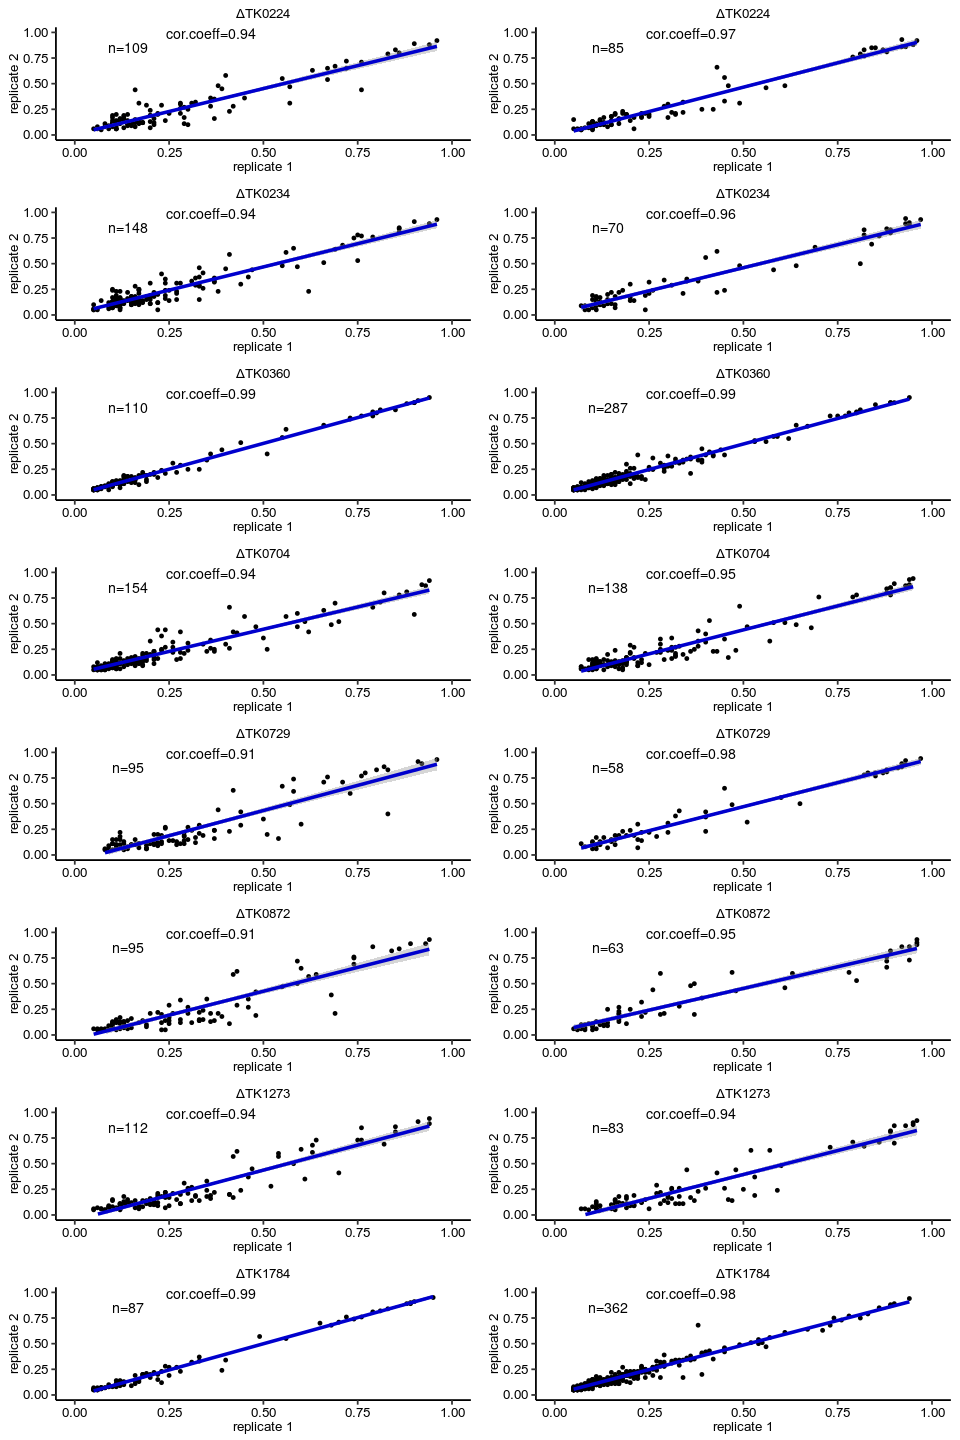

In [18]:
options(repr.plot.width = 4, repr.plot.height = 12)

plot_grid(ncol=2,
    lin_reg(eTK0224exoS, "TK0224", "exoS"), lin_reg(eTK0224statS, "TK0224", "statS"),
    lin_reg(eTK0234exoS, "TK0234", "exoS"), lin_reg(eTK0234statS, "TK0234", "statS"),
    lin_reg(eTK0360exoS, "TK0360", "exoS"), lin_reg(eTK0360statS, "TK0360", "statS"),
    lin_reg(eTK0704exoS, "TK0704", "exoS"), lin_reg(eTK0704statS, "TK0704", "statS"),
    lin_reg(eTK0729exoS, "TK0729", "exoS"), lin_reg(eTK0729statS, "TK0729", "statS"),
    lin_reg(eTK0872exoS, "TK0872", "exoS"), lin_reg(eTK0872statS, "TK0872", "statS"),
    lin_reg(eTK1273exoS, "TK1273", "exoS"), lin_reg(eTK1273statS, "TK1273", "statS"),
    lin_reg(eTK1784exoS, "TK1784", "exoS"), lin_reg(eTK1784statS, "TK1784", "statS")
         )




In [23]:
ggsave('RMTase_lin_reg_brady_bunch_1.pdf', device = cairo_pdf, path='./figures/', 
       width=3.3, height=12, dpi = 300)

In [4]:
###strain TK1917

#load CGmaps into session
TK1917exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1917exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1917", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK1917statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1917statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1917", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK1917exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1917exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1917", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK1917statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1917statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1917", growth_phase='stationary', metabolic_condition="S", replicate="rep2")
Sys.sleep(15)


# process raw CGmaps
TK1917exoS_Dec2016_df <- processCGmap(TK1917exoS_CGmap_Dec2016)
TK1917exoS_Oct2020_df <- processCGmap(TK1917exoS_CGmap_Oct2020)
TK1917statS_Dec2016_df <- processCGmap(TK1917statS_CGmap_Dec2016)
TK1917statS_Oct2020_df <- processCGmap(TK1917statS_CGmap_Oct2020)

#merge reps
TK1917exoS <- merge_del_reps(x=TK1917exoS_Dec2016_df, y=TK1917exoS_Oct2020_df, strain='TK1917')
TK1917statS <- merge_del_reps(x=TK1917statS_Dec2016_df, y=TK1917statS_Oct2020_df,  strain='TK1917')


eTK1917exoS <- enumerate_hiconf_2reps(TK1917exoS, "TK1917")
eTK1917statS <- enumerate_hiconf_2reps(TK1917statS, "TK1917")

Sys.sleep(15)


In [5]:
###strain TK1935

#load CGmaps into session
TK1935exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1935exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1935", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK1935statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK1935statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1935", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK1935exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1935exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1935", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK1935statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK1935statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK1935", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK1935exoS_Dec2016_df <- processCGmap(TK1935exoS_CGmap_Dec2016)
TK1935exoS_Oct2020_df <- processCGmap(TK1935exoS_CGmap_Oct2020)
TK1935statS_Dec2016_df <- processCGmap(TK1935statS_CGmap_Dec2016)
TK1935statS_Oct2020_df <- processCGmap(TK1935statS_CGmap_Oct2020)

#merge reps
TK1935exoS <- merge_del_reps(x=TK1935exoS_Dec2016_df, y=TK1935exoS_Oct2020_df, strain='TK1935')
TK1935statS <- merge_del_reps(x=TK1935statS_Dec2016_df, y=TK1935statS_Oct2020_df,  strain='TK1935')


eTK1935exoS <- enumerate_hiconf_2reps(TK1935exoS, "TK1935")
eTK1935statS <- enumerate_hiconf_2reps(TK1935statS, "TK1935")

Sys.sleep(15)


In [6]:
###strain TK2122

#load CGmaps into session
TK2122exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2122exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2122", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK2122statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2122statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2122", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK2122exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2122exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2122", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK2122statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2122statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2122", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK2122exoS_Dec2016_df <- processCGmap(TK2122exoS_CGmap_Dec2016)
TK2122exoS_Oct2020_df <- processCGmap(TK2122exoS_CGmap_Oct2020)
TK2122statS_Dec2016_df <- processCGmap(TK2122statS_CGmap_Dec2016)
TK2122statS_Oct2020_df <- processCGmap(TK2122statS_CGmap_Oct2020)

#merge reps
TK2122exoS <- merge_del_reps(x=TK2122exoS_Dec2016_df, y=TK2122exoS_Oct2020_df, strain='TK2122')
TK2122statS <- merge_del_reps(x=TK2122statS_Dec2016_df, y=TK2122statS_Oct2020_df,  strain='TK2122')


eTK2122exoS <- enumerate_hiconf_2reps(TK2122exoS, "TK2122")
eTK2122statS <- enumerate_hiconf_2reps(TK2122statS, "TK2122")

Sys.sleep(15)


In [7]:
###strain TK2241

#load CGmaps into session
TK2241exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2241exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2241", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK2241statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2241statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2241", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK2241exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2241exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2241", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK2241statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2241statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2241", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK2241exoS_Dec2016_df <- processCGmap(TK2241exoS_CGmap_Dec2016)
TK2241exoS_Oct2020_df <- processCGmap(TK2241exoS_CGmap_Oct2020)
TK2241statS_Dec2016_df <- processCGmap(TK2241statS_CGmap_Dec2016)
TK2241statS_Oct2020_df <- processCGmap(TK2241statS_CGmap_Oct2020)

#merge reps
TK2241exoS <- merge_del_reps(x=TK2241exoS_Dec2016_df, y=TK2241exoS_Oct2020_df, strain='TK2241')
TK2241statS <- merge_del_reps(x=TK2241statS_Dec2016_df, y=TK2241statS_Oct2020_df,  strain='TK2241')


eTK2241exoS <- enumerate_hiconf_2reps(TK2241exoS, "TK2241")
eTK2241statS <- enumerate_hiconf_2reps(TK2241statS, "TK2241")

Sys.sleep(15)


In [8]:
###strain TK2304

#load CGmaps into session
TK2304exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2304exoS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK2304statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2304statS_totalRNA_Dec2016.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK2304exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2304exoS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK2304statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2304statS_totalRNA_Oct2020.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK2304exoS_Dec2016_df <- processCGmap(TK2304exoS_CGmap_Dec2016)
TK2304exoS_Oct2020_df <- processCGmap(TK2304exoS_CGmap_Oct2020)
TK2304statS_Dec2016_df <- processCGmap(TK2304statS_CGmap_Dec2016)
TK2304statS_Oct2020_df <- processCGmap(TK2304statS_CGmap_Oct2020)

#merge reps
TK2304exoS <- merge_del_reps(x=TK2304exoS_Dec2016_df, y=TK2304exoS_Oct2020_df, strain='TK2304')
TK2304statS <- merge_del_reps(x=TK2304statS_Dec2016_df, y=TK2304statS_Oct2020_df,  strain='TK2304')


eTK2304exoS <- enumerate_hiconf_2reps(TK2304exoS, "TK2304")
eTK2304statS <- enumerate_hiconf_2reps(TK2304statS, "TK2304")

Sys.sleep(15)


In [9]:
###strain TK2304_1935

#load CGmaps into session
TK2304_1935exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2304_1935_exoS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304_1935", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK2304_1935statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK2304_1935_statS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304_1935", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK2304_1935exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2304_1935_exoS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304_1935", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK2304_1935statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK2304_1935_statS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK2304_1935", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK2304_1935exoS_Dec2016_df <- processCGmap(TK2304_1935exoS_CGmap_Dec2016)
TK2304_1935exoS_Oct2020_df <- processCGmap(TK2304_1935exoS_CGmap_Oct2020)
TK2304_1935statS_Dec2016_df <- processCGmap(TK2304_1935statS_CGmap_Dec2016)
TK2304_1935statS_Oct2020_df <- processCGmap(TK2304_1935statS_CGmap_Oct2020)

#merge reps
TK2304_1935exoS <- merge_del_reps(x=TK2304_1935exoS_Dec2016_df, y=TK2304_1935exoS_Oct2020_df, strain='TK2304_1935')
TK2304_1935statS <- merge_del_reps(x=TK2304_1935statS_Dec2016_df, y=TK2304_1935statS_Oct2020_df,  strain='TK2304_1935')


eTK2304_1935exoS <- enumerate_hiconf_2reps(TK2304_1935exoS, "TK2304_1935")
eTK2304_1935statS <- enumerate_hiconf_2reps(TK2304_1935statS, "TK2304_1935")

Sys.sleep(15)


In [10]:
###strain TK0234_0224

#load CGmaps into session
TK0234_0224exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234_0224_exoS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0224", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0234_0224statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234_0224_statS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0224", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0234_0224exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234_0224_exoS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0224", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0234_0224statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234_0224_statS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0224", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0234_0224exoS_Dec2016_df <- processCGmap(TK0234_0224exoS_CGmap_Dec2016)
TK0234_0224exoS_Oct2020_df <- processCGmap(TK0234_0224exoS_CGmap_Oct2020)
TK0234_0224statS_Dec2016_df <- processCGmap(TK0234_0224statS_CGmap_Dec2016)
TK0234_0224statS_Oct2020_df <- processCGmap(TK0234_0224statS_CGmap_Oct2020)

#merge reps
TK0234_0224exoS <- merge_del_reps(x=TK0234_0224exoS_Dec2016_df, y=TK0234_0224exoS_Oct2020_df, strain='TK0234_0224')
TK0234_0224statS <- merge_del_reps(x=TK0234_0224statS_Dec2016_df, y=TK0234_0224statS_Oct2020_df,  strain='TK0234_0224')


eTK0234_0224exoS <- enumerate_hiconf_2reps(TK0234_0224exoS, "TK0234_0224")
eTK0234_0224statS <- enumerate_hiconf_2reps(TK0234_0224statS, "TK0234_0224")

Sys.sleep(15)


In [11]:
###strain TK0234_0729

#load CGmaps into session
TK0234_0729exoS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234_0729_exoS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0729", growth_phase='exoponential', metabolic_condition="S", replicate="rep1")

TK0234_0729statS_CGmap_Dec2016 <-read.delim("../cgmaps/TK0234_0729_statS_totalRNA_rep1.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0729", growth_phase='stationary', metabolic_condition="S", replicate="rep1")

TK0234_0729exoS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234_0729_exoS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0729", growth_phase='exoponential', metabolic_condition="S", replicate="rep2")

TK0234_0729statS_CGmap_Oct2020 <-read.delim("../cgmaps/TK0234_0729_statS_totalRNA_rep2.CGmap", sep='\t', header=FALSE,col.names=cols) %>%
    mutate(strain="TK0234_0729", growth_phase='stationary', metabolic_condition="S", replicate="rep2")


# process raw CGmaps
TK0234_0729exoS_Dec2016_df <- processCGmap(TK0234_0729exoS_CGmap_Dec2016)
TK0234_0729exoS_Oct2020_df <- processCGmap(TK0234_0729exoS_CGmap_Oct2020)
TK0234_0729statS_Dec2016_df <- processCGmap(TK0234_0729statS_CGmap_Dec2016)
TK0234_0729statS_Oct2020_df <- processCGmap(TK0234_0729statS_CGmap_Oct2020)

#merge reps
TK0234_0729exoS <- merge_del_reps(x=TK0234_0729exoS_Dec2016_df, y=TK0234_0729exoS_Oct2020_df, strain='TK0234_0729')
TK0234_0729statS <- merge_del_reps(x=TK0234_0729statS_Dec2016_df, y=TK0234_0729statS_Oct2020_df,  strain='TK0234_0729')


eTK0234_0729exoS <- enumerate_hiconf_2reps(TK0234_0729exoS, "TK0234_0729")
eTK0234_0729statS <- enumerate_hiconf_2reps(TK0234_0729statS, "TK0234_0729")

Sys.sleep(15)


`geom_smooth()` using formula = 'y ~ x'
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'arial' not found in PostScript font database”
Warning message in grid.Call(

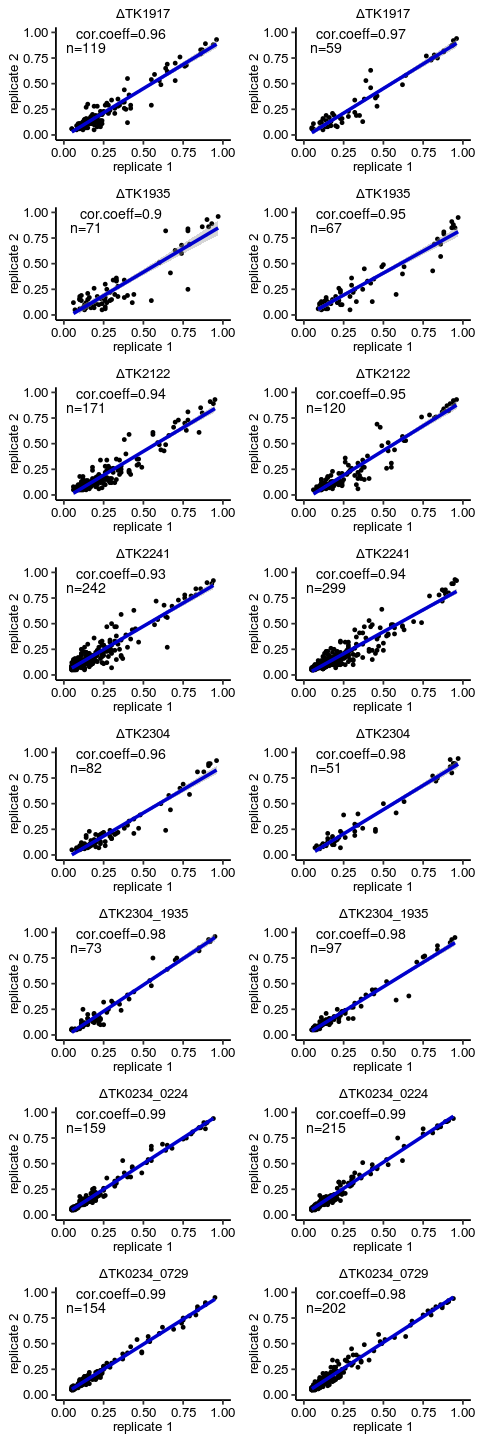

In [12]:
options(repr.plot.width = 4, repr.plot.height = 12)

plot_grid(ncol=2,
    lin_reg(eTK1917exoS, "TK1917", "exoS"), lin_reg(eTK1917statS, "TK1917", "statS"),
    lin_reg(eTK1935exoS, "TK1935", "exoS"), lin_reg(eTK1935statS, "TK1935", "statS"),
    lin_reg(eTK2122exoS, "TK2122", "exoS"), lin_reg(eTK2122statS, "TK2122", "statS"),
    lin_reg(eTK2241exoS, "TK2241", "exoS"), lin_reg(eTK2241statS, "TK2241", "statS"),
    lin_reg(eTK2304exoS, "TK2304", "exoS"), lin_reg(eTK2304statS, "TK2304", "statS"), 
    lin_reg(eTK2304_1935exoS, "TK2304_1935", "exoS"), lin_reg(eTK2304_1935statS, "TK2304_1935", "statS"),
    lin_reg(eTK0234_0224exoS, "TK0234_0224", "exoS"), lin_reg(eTK0234_0224statS, "TK0234_0224", "statS"),
    lin_reg(eTK0234_0729exoS, "TK0234_0729", "exoS"), lin_reg(eTK0234_0729statS, "TK0234_0729", "statS")
         )

ggsave('RMTase_lin_reg_brady_bunch_2.pdf', device = cairo_pdf, path='./figures/', 
       width=3.3, height=12, dpi = 300)